<a href="https://colab.research.google.com/github/KlaineK/CompBio2023/blob/main/ComputationalBio_Ses4_KeshiaJeanDarma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#impot sequence
import Bio
from Bio.Seq import Seq

In [ ]:
Seq1 = Seq('CGATAGTACT')
Seq2 = Seq('CGTATG')

print(Seq1, Seq2)

CGATAGTACT CGTATG


In [ ]:
#Alignment
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [ ]:
#creating global alignment
#globalxx(x,y)
#x for initial sequence, y for compared sequence
global_alignment = pairwise2.align.globalxx(Seq1, Seq2)

for align in global_alignment: 
    print(align)

print('\n')
for align in global_alignment: 
    print(format_alignment(*align))

#default score :
#match : 1


Alignment(seqA='CGATAGTACT-', seqB='C----GTA-TG', score=5.0, start=0, end=11)
Alignment(seqA='CGATAGTACT-', seqB='CG----TA-TG', score=5.0, start=0, end=11)
Alignment(seqA='CGATAGTACT-', seqB='CG-T---A-TG', score=5.0, start=0, end=11)
Alignment(seqA='CGATAGTACT-', seqB='CG-TA----TG', score=5.0, start=0, end=11)
Alignment(seqA='CGATAGTACT-', seqB='CG-TA-T---G', score=5.0, start=0, end=11)
Alignment(seqA='CGATAGTACT', seqB='CG-TA-T--G', score=5.0, start=0, end=10)
Alignment(seqA='CGATAGTACT', seqB='CG-TA-T-G-', score=5.0, start=0, end=10)
Alignment(seqA='CGATAGTACT', seqB='CG-TA-TG--', score=5.0, start=0, end=10)
Alignment(seqA='CGATA-GTACT', seqB='CG-TATG----', score=5.0, start=0, end=11)
Alignment(seqA='CG-ATAGTACT', seqB='CGTAT-G----', score=5.0, start=0, end=11)


CGATAGTACT-
|    ||| | 
C----GTA-TG
  Score=5

CGATAGTACT-
||    || | 
CG----TA-TG
  Score=5

CGATAGTACT-
|| |   | | 
CG-T---A-TG
  Score=5

CGATAGTACT-
|| ||    | 
CG-TA----TG
  Score=5

CGATAGTACT-
|| || |    
CG-TA-T---G


In [ ]:
#Local Alignment
local_alignment = pairwise2.align.localxx(Seq1, Seq2)

for align in local_alignment:
    print(format_alignment(*align))

1 CGATAGTACT
  |    ||| |
1 C----GTA-T
  Score=5

1 CGATAGTACT
  ||    || |
1 CG----TA-T
  Score=5

1 CGATAGTACT
  || |   | |
1 CG-T---A-T
  Score=5

1 CGATAGTACT
  || ||    |
1 CG-TA----T
  Score=5

1 CGATAGT
  || || |
1 CG-TA-T
  Score=5

1 CGATA-G
  || || |
1 CG-TATG
  Score=5

1 CG-ATAG
  || || |
1 CGTAT-G
  Score=5



In [ ]:
#example case :
# match : 2.0
# mismatch : -1.0
# gap : -0.5
# extend : -0.1

# extend : gap berurutan setelah gap(gap pertama masih disebut gap, tapi untuk berikutnya disebut extend) 

#global alignment
#urutan parameter score : match, mismatch, gap, extend
example_alignment = pairwise2.align.globalms(Seq1, Seq2, 2, -1, -0.5, -0.1)
for align in example_alignment :
    print(format_alignment(*align))

CGATAGTACT-
|    ||| | 
C----GTA-TG
  Score=8.2

CGATAGTACT-
||    || | 
CG----TA-TG
  Score=8.2

CGATAGTACT-
|| ||    | 
CG-TA----TG
  Score=8.2

CGATA-GTACT
|| || |    
CG-TATG----
  Score=8.2

CG-ATAGTACT
|| || |    
CGTAT-G----
  Score=8.2



In [ ]:
# showing only one alignment and its score
#attribute/parameter 'one_alignment_only' untuk menunjukkan satu saja
#'score_only' untuk menunjukkan score saja

global_score = pairwise2.align.globalxx(Seq1, Seq2, one_alignment_only = True, score_only = True)

print(global_score)

#similarity percentage
similarity = global_score / len(Seq1) * 100

print('Similarity', similarity, '%')

5.0
Similarity 50.0 %


Hamming Distance
menunjukkan total jumlah value yang berbeda.

Levenshtein distance
Menunjukkan berapa kali tindakan yang harus dilakukan untuk menyamakan perbedaan sequence

In [ ]:
#Hamming distance 
#zip untuk menggabungkan sequence dalam parameter sehingga bisa dibandingkan

print(Seq1)
print(Seq2)

def hamming_distance(seq1, seq2):
    if(len(seq1) != len(seq2)):
        return 0
    else:
        data = [(seq1, seq2) for seq1, seq2 in zip(seq1, seq2) if (seq1 != seq2)]
        print(data)
        return len(data)

hamming_value = hamming_distance(Seq1, Seq2)
print('Hamming distance value :', hamming_value)

CGATAGTACT
CGTATG
[('A', 'T'), ('T', 'A'), ('A', 'T')]
Hamming distance value : 3


In [ ]:
#Levenshtein distance 
#bisa digunakan untuk sequence yang panjangnya beda

#jika sudah terinstall :
from Levenshtein import distance
#atau jika belum terinstall : 
#%pip install python-Levenshtein

In [ ]:

print(Seq1)
print(Seq2)
print('Levenshtein distance value : ', distance(Seq1, Seq2))

#valuenya ada 5, karena Seq2 ditambahi T di urutan ke 3, dan ditambahi TACT di akhir

CGATAGTACT
CGTATG
Levenshtein distance value :  5


DotPlot

In [ ]:
#dotplot
import matplotlib.pyplot as plt
import numpy 

In [ ]:
#functions :

def check(x, y):
    if(x == y ): 
        return 1
    else :
        return 0

def matrix(seq1, seq2):
    len_seq1 = len(seq1)
    len_seq2 = len(seq2)
    #seperti nested for di C
    #for(int i...)
    #   for(int j...)
    return [[check(seq1[i], seq2[j]) for j in range(len_seq2) ] for i in range(len_seq1)]

print(matrix(Seq1, Seq2))

[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0]]


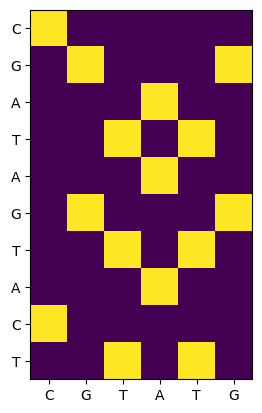

In [ ]:
#dotplot

result = matrix(Seq1, Seq2)
dotplot = plt.imshow(numpy.array(result))
#x-axis labeling
xLabel = plt.xticks(numpy.arange(len(Seq2)), Seq2)
yLabel = plt.yticks(numpy.arange(len(Seq1)), Seq1)

Exercise

In [ ]:
import Bio
from Bio.Seq import Seq
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
seqa = Seq('AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT')
seqb = Seq('TCTGAAGCTAGCTAGTGCATAGCTAGCTAGC')

In [ ]:
#local alignment 
local_align = pairwise2.align.localxx(seqa, seqb)

for align in local_align:
    print(align)
    print(format_alignment(*align))

Alignment(seqA='----AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGCT', seqB='TCTGAAGC-TAGCTAG-TGCA-T-AGCTAGCTAGC-', score=26.0, start=4, end=35)
1 AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGC
  |||| |||||||  ||| | |||||||||||
5 AAGC-TAGCTAG-TGCA-T-AGCTAGCTAGC
  Score=26

Alignment(seqA='----AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGCT', seqB='TCTGAAGCT-AGCTAG-TGCA-T-AGCTAGCTAGC-', score=26.0, start=4, end=35)
1 AAGCTTAGCTAGA-GCAGTCAGCTAGCTAGC
  ||||| ||||||  ||| | |||||||||||
5 AAGCT-AGCTAG-TGCA-T-AGCTAGCTAGC
  Score=26

Alignment(seqA='----AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT', seqB='TCTGAAGC-TAGCTAGTGCA-T-AGCTAGCTAGC-', score=26.0, start=4, end=34)
1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  |||| |||||||.||| | |||||||||||
5 AAGC-TAGCTAGTGCA-T-AGCTAGCTAGC
  Score=26

Alignment(seqA='----AAGCTTAGCTAGAGCAGTCAGCTAGCTAGCT', seqB='TCTGAAGCT-AGCTAGTGCA-T-AGCTAGCTAGC-', score=26.0, start=4, end=34)
1 AAGCTTAGCTAGAGCAGTCAGCTAGCTAGC
  ||||| ||||||.||| | |||||||||||
5 AAGCT-AGCTAGTGCA-T-AGCTAGCTAGC
  Score=26



In [ ]:
#Hamming distance

def hamming_dist(sqa, sqb):
    if(len(sqa) != len(sqb)):
        return 0
    else:
        data = [(sqa,sqb) for sqa, sqb in zip(sqa, sqb) if (sqa != sqb)]
        print(data)
        return len(data)

print('Hamming distance value : ', hamming_dist(seqa, seqb))

[('A', 'T'), ('A', 'C'), ('G', 'T'), ('C', 'G'), ('T', 'A'), ('T', 'A'), ('A', 'G'), ('G', 'C'), ('C', 'T'), ('T', 'A'), ('A', 'G'), ('G', 'C'), ('A', 'T'), ('G', 'A'), ('C', 'G'), ('A', 'T'), ('T', 'C'), ('C', 'A'), ('A', 'T'), ('G', 'A'), ('C', 'G'), ('T', 'C'), ('A', 'T'), ('G', 'A'), ('C', 'G'), ('T', 'C'), ('A', 'T'), ('G', 'A'), ('C', 'G'), ('T', 'C')]
Hamming distance value :  30


In [ ]:
#Levenshtein distance

from Levenshtein import distance 
print('Levenshtein distance value : ', distance(seqa, seqb))

Levenshtein distance value :  9


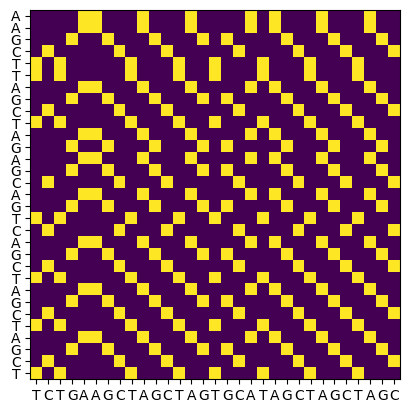

In [ ]:
import matplotlib.pyplot as plt
import numpy

def cekk(x, y):
    if(x == y ): 
        return 1
    else :
        return 0

def matriks(seqa, seqb):
    len_seq1 = len(seqa)
    len_seq2 = len(seqb)
    #seperti nested for di C
    #for(int i...)
    #   for(int j...)
    return [[check(seqa[i], seqb[j]) for j in range(len_seq2) ] for i in range(len_seq1)]

matrik = matriks(seqa, seqb)
plotting = plt.imshow(numpy.array(matrik))
axisx = plt.xticks(numpy.arange(len(seqb)), seqb)
axisy = plt.yticks(numpy.arange(len(seqa)), seqa)